# Group Exercises


## Exercise

The aim of this exercise is to show that there is a market for call options. We will do this by showing that investors will get better results from trading in options than from just buying and selling stock.

Suppose that an investor believes that a stock will follow geometric Brownian motion
$$
d S_t = S_t(\mu_B \, dt + \sigma_B \, dW_t)
$$
where the parameters $\mu_B$ and $\sigma_B$ reflect the investor's beliefs until maturity $T=1$.
Suppose the initial stock price is $S_0=100$.

Suppose that the investor can buy and sell call options at the Black-Scholes price when this is computed using a value $\sigma=\sigma_I$. $\sigma_I$ is called the *implied volatility* as it is the volatility implied by option prices. In reality the Black-Scholes model is imperfect so if you look at real option prices, different options will have different implied volatilities, but for the sake of this example we are assuming all the option prices in the market are perfectly consistent with the Black-Scholes model.

Suppose that the investor has an initial wealth of $\Pi_0=0$ and they trade in a way that maximizes their expected utility
$$
{\mathbb E}( -\exp(-\lambda \Pi_T))
$$
where $\Pi_T$ is their final wealth and $\lambda$ is a risk-aversion parameter.

The investor wishes to trade in stock, a risk-free bank account and call options with strikes $80+5i$ for $0 \leq i \leq 9$. Their
portfolio can be described by the vector of quantities $(q_0,q_1,\ldots,q_{11})$, where $q_{10}$ is the quantity of stock, $q_{11}$ is the quantity in the risk-free account and otherwise $q_i$ is the quantity of call options with strike $80+5i$. The investor wishes to follow a buy-and-hold strategy in options because they do not have the energy to rehedge the portfolio in continuous time. They are happy to purchase options instead from a bank's derivatives desk and let the derivatives traders worry about continuous time trading.

Assume that $\sigma_I=\sigma_B=0.3$, $\mu_B=0.08$, $r=0.02$ and $\lambda=1$.
Simulate 100000 stock prices scenarios at the final time $T$. Write a function that estimates the expected utility of the portfolio represented by the vector $q$ given a set of stock price scenarios. Find a vector $q$ that meets the condition that the initial wealth is $0$ but m this estimate for the expected utility. Note that it is important to only simulate the stock prices: optimization software minimizes non-random functions, using the same scenarios each time you compute the utility will ensure your function is non-random.

The resulting portfolio $q$ will have a payoff that depends only on $S_T$. Plot a graph of this payoff function.

Repeat your analysis on the assumption that $\sigma_B=0.2$ and $\sigma_B=0.4$ but $\sigma_I$ remains fixed at $0.3$. Your simulation is intended to compute the expected utility of the trader, so you should perform your simulation according to their beliefs.

In [14]:
import fmlib as fm
import numpy as np
S0=100
T=1
t0=0
r=0.02
mu=0.08
sigma=0.3
sigma_I=0.3
lambda_risk=1
n_steps=365
n_paths=100000


In [15]:
np.random.seed(0)
S , t = fm.simulate_gbm_paths(S0, mu, sigma, T, n_steps, n_paths)
ST = S[:,-1]


In [16]:
K = [80 + 5*i for i in range(0,10)]
C = [fm.black_scholes_call_price(S0, t0, 80+5*i, T, r, sigma) for i in range(0,10)]




In [19]:
def expected_utility_estimate(q_vars,ST,C,K,S0,r,T,lambda_risk):
    q_call=q_vars[:10]
    q_stock=q_vars[10]
    
    Total_cost=np.dot(q_call,C)+q_stock*S0
    q_bank=-Total_cost
    
    W = np.zeros((n_paths,10))

    W = np.maximum(ST[:, None] - np.array(K), 0)
    
    payoff_calls=W@q_call
    payoff_bank=q_bank*np.exp(r*T)
    payoff_stock=q_stock*ST
    Total_payoff=payoff_stock+payoff_bank+payoff_calls
    
    utility= -np.exp(-lambda_risk*Total_payoff)
    return -np.mean(utility)
    

In [20]:
from scipy.optimize import minimize
x0 = np.zeros(11)
result = minimize(expected_utility_estimate ,x0,args = (ST,C,K,S0,r,T,lambda_risk)  ,method = 'BFGS')
X_max = result.x
result


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.979544758680199
        x: [-7.774e-03  6.092e-03 -1.155e-02  1.961e-02 -2.252e-02
             1.589e-02 -6.235e-03  1.334e-03 -1.570e-03 -1.232e-03
             1.203e-02]
      nit: 31
      jac: [-1.036e-06 -1.021e-06 -9.164e-07 -1.013e-06 -9.760e-07
            -8.866e-07 -8.941e-07 -8.345e-07 -7.674e-07 -7.749e-07
            -1.043e-06]
 hess_inv: [[ 1.559e+00 -2.613e+00 ...  8.053e-02 -1.455e-01]
            [-2.613e+00  5.806e+00 ... -1.970e-01  1.312e-01]
            ...
            [ 8.053e-02 -1.970e-01 ...  1.914e+00 -3.642e-03]
            [-1.455e-01  1.312e-01 ... -3.642e-03  4.017e-02]]
     nfev: 456
     njev: 38

In [9]:
def expected_utility_pay_off(q_vars,ST,C,K,S0,r,T,lambda_risk):
    q_call=q_vars[:10]
    q_stock=q_vars[10]
    
    Total_cost=np.dot(q_call,C)+q_stock*S0
    q_bank=-Total_cost
    
    W = np.zeros((n_paths,10))

    for i in range(10):
        W[:,i] = np.maximum(ST - K[i], 0)
    
    payoff_calls=W@q_call
    payoff_bank=q_bank*np.exp(r*T)
    payoff_stock=q_stock*ST
    Total_payoff=payoff_stock+payoff_bank+payoff_calls
    return Total_payoff






In [10]:
Z = expected_utility_pay_off(X_max,ST,C,K,S0,r,T,lambda_risk)

Text(0.5, 1.0, 'Payoff of optimal portolio')

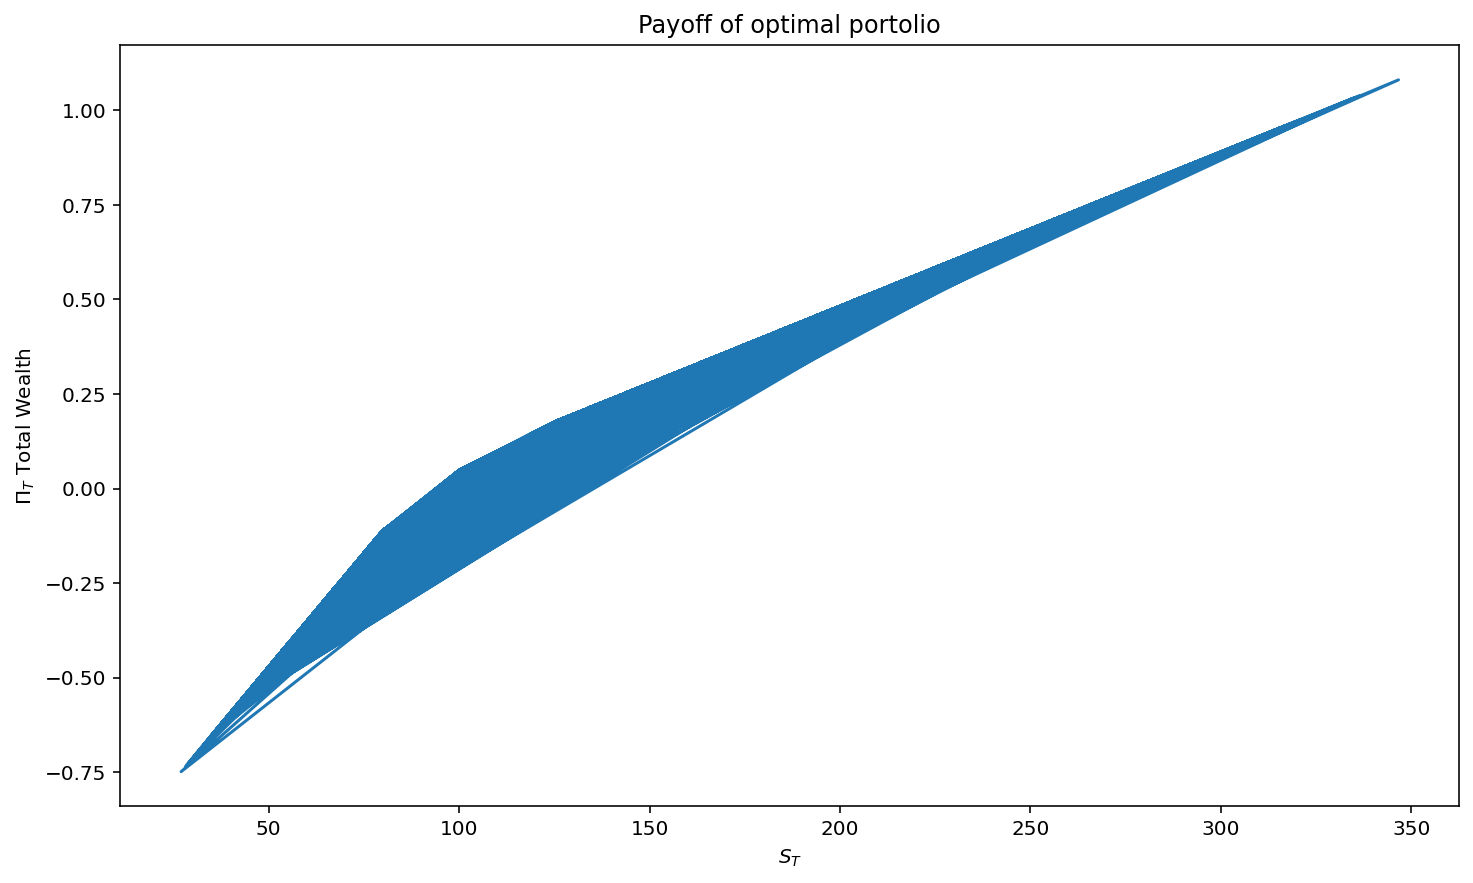

In [11]:
import matplotlib.pyplot as plt


plt.plot(ST,Z);
plt.xlabel('$S_T $')
plt.ylabel('$Π_T$ Total Wealth')
plt.title('Payoff of optimal portolio')


In [21]:
S_grid = np.linspace(0, 300, 2000)

In [22]:
import matplotlib.pyplot as plt

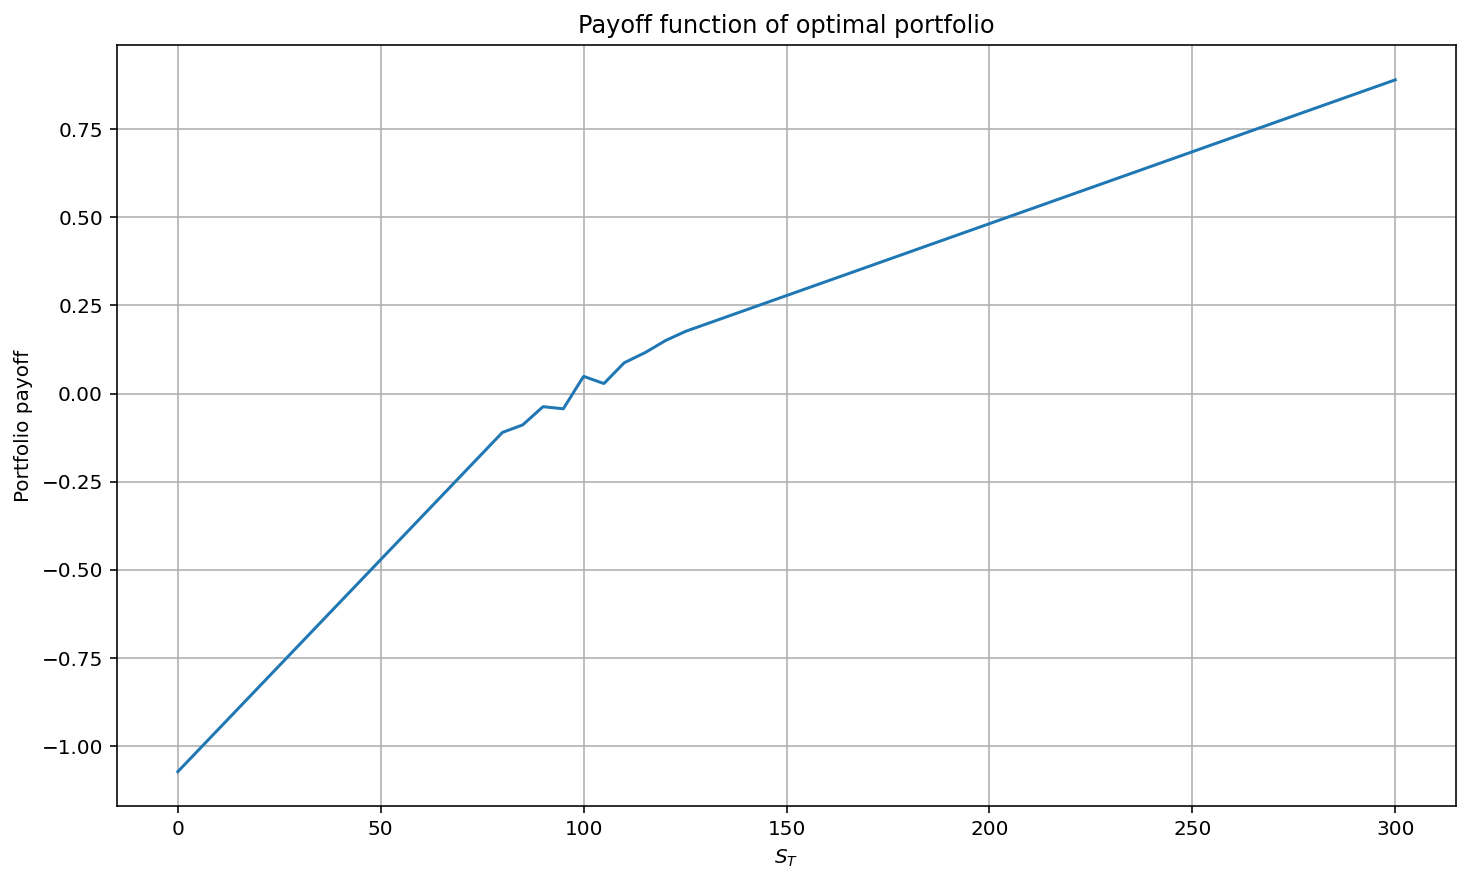

In [23]:
def payoff_function(q_vars, S, K, S0, r, T, C):
    q_call = q_vars[:10]
    q_stock = q_vars[10]
    Total_cost = np.dot(q_call, C) + q_stock*S0
    q_bank = -Total_cost
    
    payoff = q_stock*S + q_bank*np.exp(r*T)
    for i in range(10):
        payoff += q_call[i] * np.maximum(S - K[i], 0)
    return payoff

# deterministic S-grid
S_grid = np.linspace(0, 300, 2000)
payoff_grid = payoff_function(X_max, S_grid, K, S0, r, T, C)

plt.plot(S_grid, payoff_grid)
plt.xlabel("$S_T$")
plt.ylabel("Portfolio payoff")
plt.title("Payoff function of optimal portfolio")
plt.grid(True)
plt.show()
